In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as  sns
%matplotlib inline

df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/log_reg/employee-turnover-balanced.csv')
y = df['left_company']
X = df.iloc[:, 1:]

In [3]:
categories = ['frequency_of_travel','department','education','satisfaction_with_environment','gender','seniority_level', 'satisfaction_with_job','last_performance_rating','position','married_or_single']
categorical_df = df[categories].astype('object')


continuous_df = df.drop(columns= categories)
continuous_df = continuous_df.drop(['left_company'],axis =1)

In [4]:
numeric_list = continuous_df.columns.tolist()
numeric_list

['age',
 'commuting_distance',
 'last_raise_pct',
 'total_years_working',
 'years_at_company',
 'years_in_current_job',
 'years_since_last_promotion',
 'years_with_current_supervisor']

In [5]:
categoric_list = categorical_df.columns.tolist()
categoric_list

['frequency_of_travel',
 'department',
 'education',
 'satisfaction_with_environment',
 'gender',
 'seniority_level',
 'satisfaction_with_job',
 'last_performance_rating',
 'position',
 'married_or_single']

<AxesSubplot: >

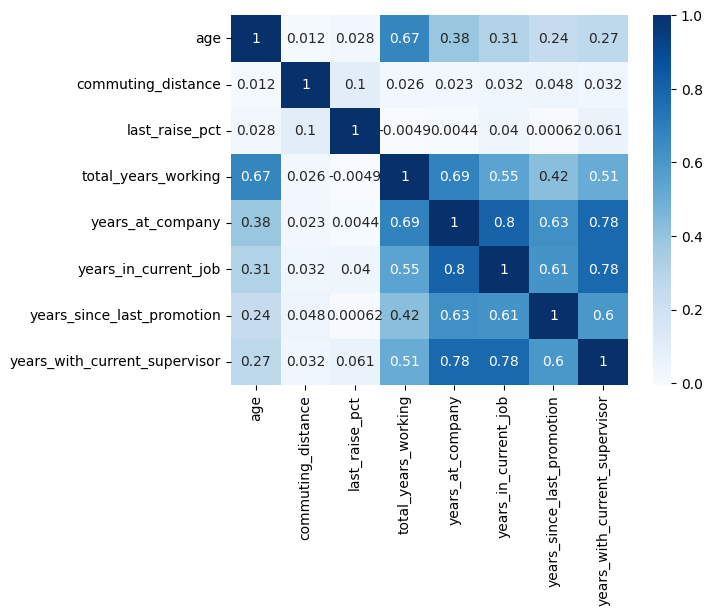

In [45]:

sns.heatmap(continuous_df.corr(), cmap="Blues", annot=True)

In [6]:
X = pd.concat([categorical_df,continuous_df],axis=1)
X.drop(['years_in_current_job','years_with_current_supervisor'], axis =1,inplace = True)
numeric_list.remove('years_in_current_job')
numeric_list.remove('years_with_current_supervisor')

#### removed the columns as they are intercorrelated with the features by checking the correlation matrix

In [7]:
from sklearn.model_selection import train_test_split

Y = df['left_company']
X_train,X_test,y_train,y_test = train_test_split(X, Y, test_size =  0.2, random_state = 124)

In [8]:
from sklearn.pipeline import Pipeline

## Handling Categorical Variables

In [11]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.impute import SimpleImputer

categoric_pipeline = Pipeline(steps = [('imputer', SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')),('onehotencoder',  OneHotEncoder(handle_unknown = 'ignore',drop = 'first'))])
X_train_cat_converted = categoric_pipeline.fit_transform(X_train[categoric_list])

## Handling Numeric Variables

In [12]:
numeric_pipeline = Pipeline(steps = [('imputer', SimpleImputer(missing_values = np.nan, strategy = 'median')),('scaler',  StandardScaler())])

X_train_numeric_converted = numeric_pipeline.fit_transform(X_train[numeric_list])

## Pipeline for transforming  both numerical and categorical variables

In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
preprocessor = ColumnTransformer(transformers = [('num', numeric_pipeline,numeric_list),('cat',categoric_pipeline, categoric_list)])

## Training Decision tree model

In [40]:
pipeline = Pipeline(steps = [('preprocessor', preprocessor), ('classifier', DecisionTreeClassifier(max_depth=3, random_state = 42))])

pipeline.fit(X_train, y_train)

y_pred_dtc = pipeline.predict(X_test)


## Train Random Forest Model

In [38]:
from sklearn.ensemble import RandomForestClassifier
pipeline_rd = Pipeline(steps = [('preprocessor', preprocessor), ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])

pipeline_rd.fit(X_train, y_train)

y_pred_rf = pipeline_rd.predict(X_test)



# Evaluate both models

In [41]:
from sklearn.metrics import accuracy_score, f1_score

# Compute the accuracy of the decision tree classifier on the testing set
accuracy_dtc = accuracy_score(y_test, y_pred_dtc)
print(f"Decision tree accuracy: {accuracy_dtc:.2f}")

# Compute the accuracy of the random forest classifier on the testing set
accuracy_rfc = accuracy_score(y_test, y_pred_rf)
print(f"Random forest accuracy: {accuracy_rfc:.2f}")


Decision tree accuracy: 0.64
Random forest accuracy: 0.89


## Explain the findings

Random forest is better in classifying the outcomes accurately than decision tree  as the accuracy is 0.89 compared to decision tree accuracy which is 0.64. This difference in performance is expected since the random forest model uses multiple trees and each tree is trained on a random subset of the features and data. This helps to reduce overfitting and improve the generalization of the model.Therefore, based on these findings, we can conclude that the random forest model is a better choice for this dataset, as it provides a more accurate and robust prediction of employee turnover compared to the decision tree model.